<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José Antonio Castaño Gutiérrez y Hector Daniel Chávez Orozco.

**Fecha:** 17 de marzo del 2021.

**Expedientes** : IF711469 e IF713442.
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Módulo 1

**Link al repositorio en Github**: https://github.com/Joseancg7/Proyecto_Modulo1

### 1.1 Simulación del Premio Melate

<div>
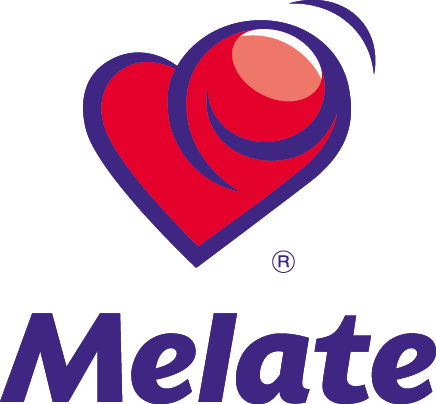
</div>

> Lo que se busca con este proyecto, es realizar una simulación de como se ha comportado el número ganador del premio Melate a lo largo del tiempo. Esta simulación se realizará tomando las variables correspondientes que conforman al ganador del premio, que en este caso son los 6 números que deben de salir para que la persona gane, para así poder buscar patrones y aproximarnos al número ganador de un concurso futuro.

>También se buscará realizar una aproximación al monto de dinero que el ganador recibirá en el próximo premio.

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Simular el comportamiento y distribucion de los numeros ganadores de lotería Melate y el monto del premio.
> #### 1.2 Objetivos específicos
>  - Modelar y analizar las distribuciones de probabilidad de los 6 numeros ganadores.
>  - Calcular números más probables a ganar el proximo premio mayor.
>  - Calcular el monto que se recibirá en el siguiente premio mayor.


### 1.3 Definición del problema.
El apostador escoge al azar una combinación de por lo menos seis número. Una vez escogida la combinación, estos números son registrados en una de las agencias de pronósticos llenando un volante de juego. Posteriormente, el sorteo se realiza de forma abierta y se transmite por televisión para darle seguridad y veracidad al proceso de selección.

>Las probabilidades de ganar el premio mayor de Melate son de 1 en 32,468,436, sin importar los números que elija o dónde compre sus billetes. Recordemos que para ganar el Melate debe escoger seis números sorteados entre el rango de 1 al 56.

>La urna de Melate elegirá de manera aleatoria 7 esferas con los números ganadores: los primeros 6 números seleccionados son llamados números naturales y el séptimo es el número adicional.

>Para ganar, los números de tu boleto deberán coincidir con un mínimo de dos números naturales. Si más números coinciden, mayor será tu premio.

>Para ganar el premio mayor, en tu boleto debes de tener los 6 números naturales que salgan. 

>Los proceso para poder obtener la simulación de los números ganadores y el monto del premio son los siguientes:

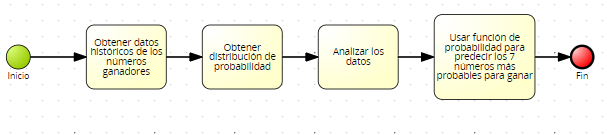



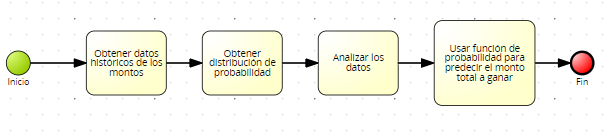

### 1.4 Nodos y variables que se decidieron simular y porqué
> Los nodos que se utilizarán para simular este proyecto, son los 7 números que se tienen que obtener para poder ganar el premio mayor, estos numeros se sacan de manera aleatoria, por lo tanto estos números son nuestras principales variables, ya que de estos números depende quien será la persona ganadora.

> Una segunda variable serán los montos que se han ido otorgando a lo largo del tiempo para tener un comportamiento de en cuanto ha ido aumentando y así poder simular de cuanto será el próximo premio.

### 1.5 Definición de hipótesis y supuestos.
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.



### 1.6 Obtención de bases de datos
> La base de datos se obtendrá directamente de la página oficial de Pronósticos para la Asistencia Pública, mismo organismo encargado de realizar el sorteo del Melate. https://www.pronosticos.gob.mx/

> Pronósticos para la Asistencia Pública es un organismo público descentralizado del Estado Mexicano con el objetivo de captar recursos por medio de apuestas para destinarlos al gasto y ayuda pública. Fue constituido en 1978 iniciando con el campeonato mundial de futból en Argentina y extendiendose a lo largo de los años con sorteos tipo progol, prohit, tris, melate, chispazo, entre otros.

> En esta base de datos podemos visualizar distintas variables del sorteo desde su inicio en 1984 hasta el día de hoy. 
Las variables que identificamos son:
>- Número de concurso.
>- Siete números seleccionados en el sorteo.
>- Bolsa o monto total del premio repartido. 
>- Fecha en la cuál se realizó.

https://www.pronosticos.gob.mx/Paginas/Melate/historico-melate

In [67]:
import pandas as pd

data_melate = pd.read_csv('Melate.csv', index_col='FECHA')
data_melate

,CONCURSO,R1,R2,R3,R4,R5,R6,R7,BOLSA
FECHA,,,,,,,,,
10/3/21,3439,1,11,14,23,46,49,34,52300000
7/3/21,3438,4,7,18,19,20,37,17,49000000
3/3/21,3437,10,14,15,23,49,52,4,45500000
28/02/2021,3436,15,27,30,38,44,55,41,41300000
24/02/2021,3435,4,22,28,38,49,51,32,37900000
...,...,...,...,...,...,...,...,...,...
16/09/1984,5,4,10,13,18,33,39,11,0
9/9/84,4,8,12,15,18,20,34,37,0
2/9/84,3,16,18,19,21,29,32,27,0


### 1.7 Visualización de resultados de simulación.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib
from collections import defaultdict
from time import time
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import scipy.stats as stats
from IPython.display import Markdown as md
from scipy.stats import cosine
from scipy.stats import logistic
from scipy.stats import dweibull
from scipy.stats import ncf
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [103]:
def kde_scipy_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x: kde.evaluate(x)

def kde_sklearn_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis]))
    return log_pdf

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.23.2
  scipy: 1.5.2
  statsmodels: 0.12.1


In [104]:
functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return

## Nodo 1

In [71]:
N1=pd.DataFrame(data_melate['R1'])
N2=pd.DataFrame(data_melate['R2'])
N3=pd.DataFrame(data_melate['R3'])
N4=pd.DataFrame(data_melate['R4'])
N5=pd.DataFrame(data_melate['R5'])
N6=pd.DataFrame(data_melate['R6'])
N7=pd.DataFrame(data_melate['R7'])
data=N1.join(N2).join(N3).join(N4).join(N5).join(N6).join(N7)
data

,R1,R2,R3,R4,R5,R6,R7
FECHA,,,,,,,
1/1/03,12,13,17,21,37,39,14
1/1/06,1,14,19,29,36,42,41
1/1/12,12,18,41,46,51,54,4
1/1/14,5,6,7,25,33,50,51
1/1/17,42,43,45,49,51,56,6
...,...,...,...,...,...,...,...
9/9/20,5,11,28,35,38,42,30
9/9/84,8,12,15,18,20,34,37
9/9/90,4,8,12,26,28,37,5


In [72]:
N1=pd.DataFrame(data_melate['R1'])
N1

,R1
FECHA,
10/3/21,1
7/3/21,4
3/3/21,10
28/02/2021,15
24/02/2021,4
...,...
16/09/1984,4
9/9/84,8
2/9/84,16


## Estandarización de datos

In [73]:
promedio = data.mean()
des = data.std()
data_estd = (data - promedio)/des
data_estd.head(10)

,R1,R2,R3,R4,R5,R6,R7
FECHA,,,,,,,
1/1/03,0.842200,-0.116688,-0.480235,-0.803874,0.199212,-0.397736,-0.729524
1/1/06,-1.011343,0.014502,-0.252708,0.078403,0.088040,-0.037951,1.130152
1/1/12,0.842200,0.539258,2.250085,1.953242,1.755621,1.401189,-1.418294
1/1/14,-0.337327,-1.035012,-1.617868,-0.362735,-0.245476,0.921476,1.818922
1/1/17,5.897318,3.818986,2.705138,2.284096,1.755621,1.641046,-1.280540
1/1/20,0.842200,1.851149,1.226215,1.291534,1.088589,1.161332,1.474537
1/1/89,-0.842839,-1.428579,-1.162815,-0.583304,-1.134853,-0.637592,-0.591770
1/1/92,0.673696,-0.116688,-0.480235,-0.252451,0.088040,-0.397736,-1.556047
1/1/95,-0.168823,-0.379066,0.316109,-0.252451,-0.801337,-0.877449,-0.660647


Text(0, 0.5, 'Número Obtenido')

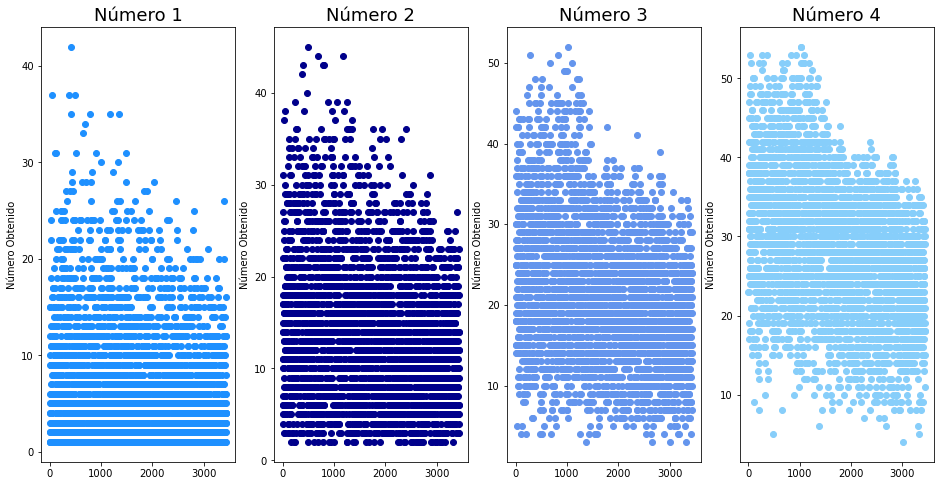

In [74]:
plt.figure(figsize=(16,8))
plt.subplot(141)
plt.scatter(np.arange(0,len(N1)),N1,color='dodgerblue')
plt.title('Número 1',size=18)
plt.ylabel('Número Obtenido')
plt.subplot(142)
plt.scatter(np.arange(0,len(N2)),N2,color='darkblue')
plt.title('Número 2',size=18)
plt.ylabel('Número Obtenido')
plt.subplot(143)
plt.scatter(np.arange(0,len(N3)),N3,color='cornflowerblue')
plt.title('Número 3',size=18)
plt.ylabel('Número Obtenido')
plt.subplot(144)
plt.scatter(np.arange(0,len(N4)),N4,color='lightskyblue')
plt.title('Número 4',size=18)
plt.ylabel('Número Obtenido')

Text(0, 0.5, 'Número Obtenido')

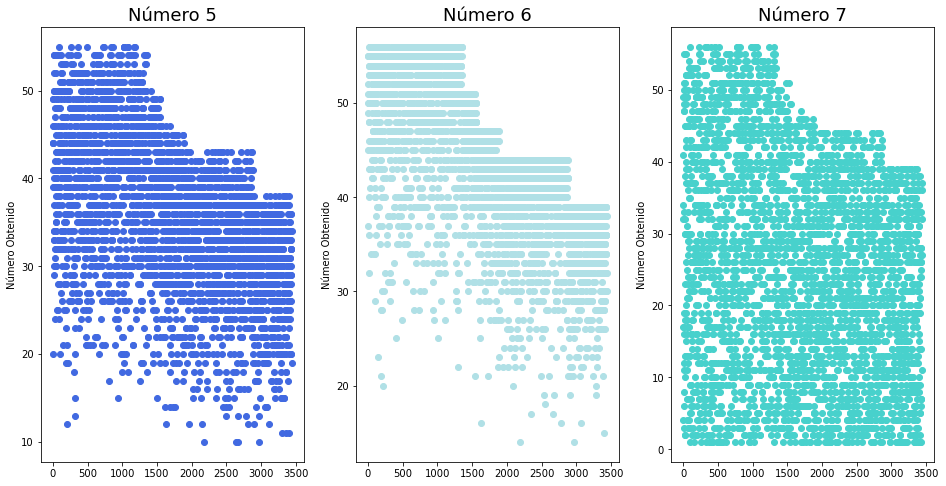

In [75]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(N5)),N5,color='royalblue')
plt.title('Número 5',size=18)
plt.ylabel('Número Obtenido')
plt.subplot(132)
plt.scatter(np.arange(0,len(N6)),N6,color='powderblue')
plt.title('Número 6',size=18)
plt.ylabel('Número Obtenido')
plt.subplot(133)
plt.scatter(np.arange(0,len(N7)),N7,color='mediumturquoise')
plt.title('Número 7',size=18)
plt.ylabel('Número Obtenido')

## Número 1 

In [76]:
Nodo1=data_melate['R1']
Nodo1

FECHA
10/3/21        1
7/3/21         4
3/3/21        10
28/02/2021    15
24/02/2021     4
              ..
16/09/1984     4
9/9/84         8
2/9/84        16
26/08/1984     5
19/08/1984     1
Name: R1, Length: 3439, dtype: int64

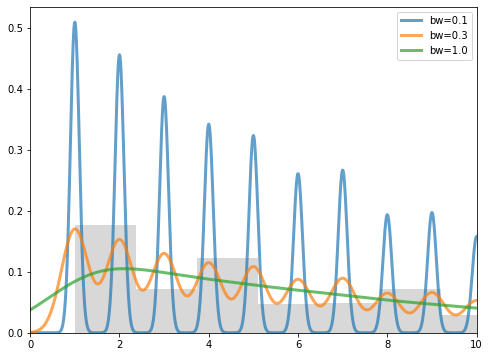

In [105]:
x_grid = np.linspace(0, 10, 1000)
x = Nodo1

fig, ax = plt.subplots(figsize=(8,6))
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 10)
ax.legend(loc='upper right')

{'bandwidth': 0.1}


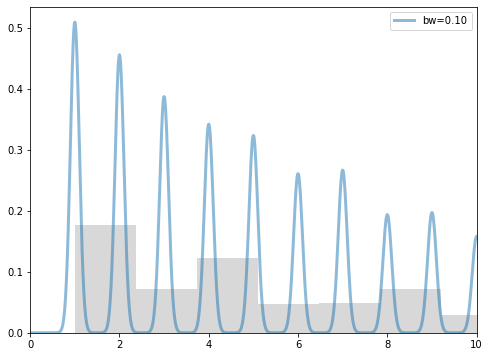

In [78]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=30) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 10);

## Método de aceptación y rechazo

In [79]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

El máximo de f es: 0.5092633355516998


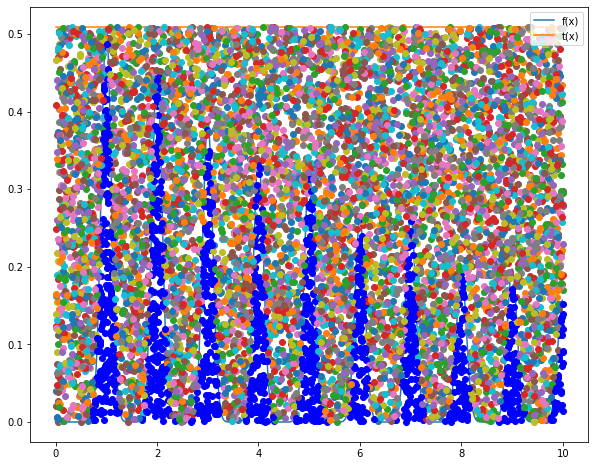

In [80]:
# Función objetivo 
x_grid = np.linspace(0, 10, 1000)
data1 = np.asarray(Nodo1)
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
# Máximo de la función f
max_f = max(f(x))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,10,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,10,N)
Acep_rechazo(R2,R1,f,t)

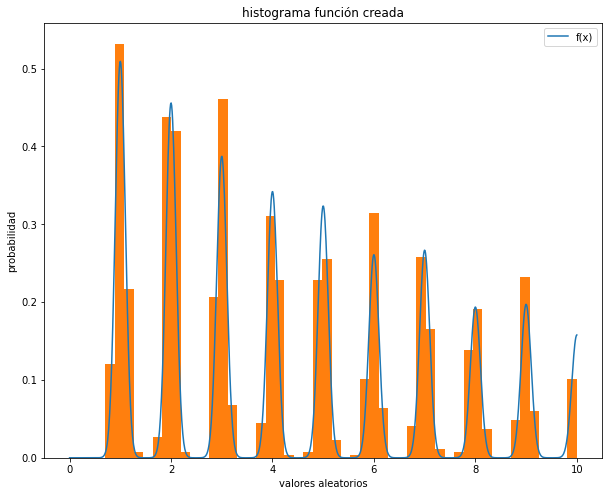

In [81]:
# Función objetivo 
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
x = np.linspace(0,10,1000) # Rango donde se graficará las funciones
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,10,N)
histograma(R2, R1, f, t)

## Distribuciones de probabilidad

[0.000672657209472741,
 0.0009304255908860401,
 0.0015693889425135762,
 0.00012175872097584188,
 0.0001621612299933318,
 0.00010186478583102925,
 0.000521651601923488,
 0.0004613725379095161]

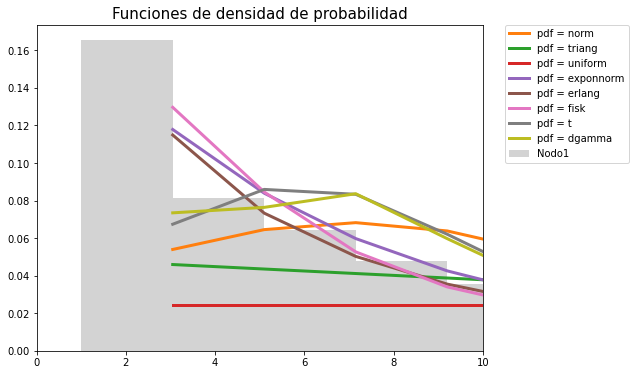

In [82]:
dist_to = ['norm','triang','uniform','exponnorm','erlang','fisk','t','dgamma']
e = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(0, 10)
[y, x, _] = ax.hist(Nodo1, bins=20, density=True, label='Nodo1',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(Nodo1)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    #plt.plot(x,pdf,label='pdf = {dist}'.format(dist_to))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    e.append(((y-pdf)**2).mean())
    
e

## Prueba de Kolmogorov-Smirnov

In [83]:
h0 = ['H_0$ = La PDF es {}'.format(dist) for dist in dist_to]
h0

['H_0$ = La PDF es norm',
 'H_0$ = La PDF es triang',
 'H_0$ = La PDF es uniform',
 'H_0$ = La PDF es exponnorm',
 'H_0$ = La PDF es erlang',
 'H_0$ = La PDF es fisk',
 'H_0$ = La PDF es t',
 'H_0$ = La PDF es dgamma']

In [84]:
ha = ['H_a$ = La PDF no es {}'.format(dist) for dist in dist_to]
ha

['H_a$ = La PDF no es norm',
 'H_a$ = La PDF no es triang',
 'H_a$ = La PDF no es uniform',
 'H_a$ = La PDF no es exponnorm',
 'H_a$ = La PDF no es erlang',
 'H_a$ = La PDF no es fisk',
 'H_a$ = La PDF no es t',
 'H_a$ = La PDF no es dgamma']

In [85]:
results = []
for i in dist_to:
    dist = getattr(st, i)
    param = dist.fit(Nodo1)
    a = st.kstest(Nodo1, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

fisk: statistic=0.10079531756407473, pvalue=7.1950932599108665e-31
exponnorm: statistic=0.12669879302522982, pvalue=1.3945849193743906e-48
erlang: statistic=0.12812150629724678, pvalue=1.1304669419399126e-49
norm: statistic=0.15008635824417194, pvalue=4.306130244425837e-68
t: statistic=0.15739790868344744, pvalue=6.996918926012239e-75
dgamma: statistic=0.18047982794224615, pvalue=1.7372439184649824e-98
triang: statistic=0.38814848070062186, pvalue=0.0
uniform: statistic=0.5755927347002461, pvalue=0.0


## Fisk

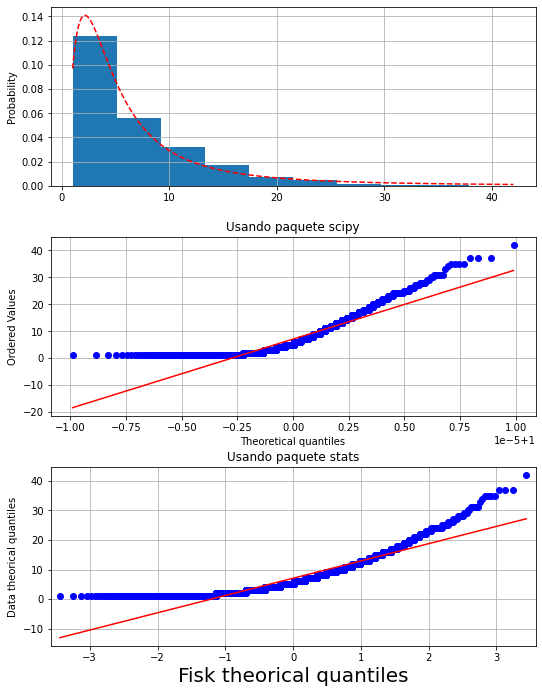

In [86]:
measurements = Nodo1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'fisk'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Exponorm

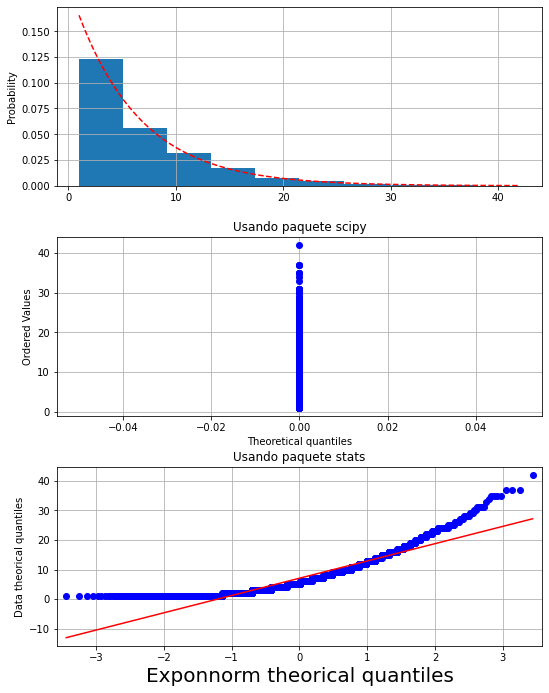

In [87]:
measurements = Nodo1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'exponnorm'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Norm

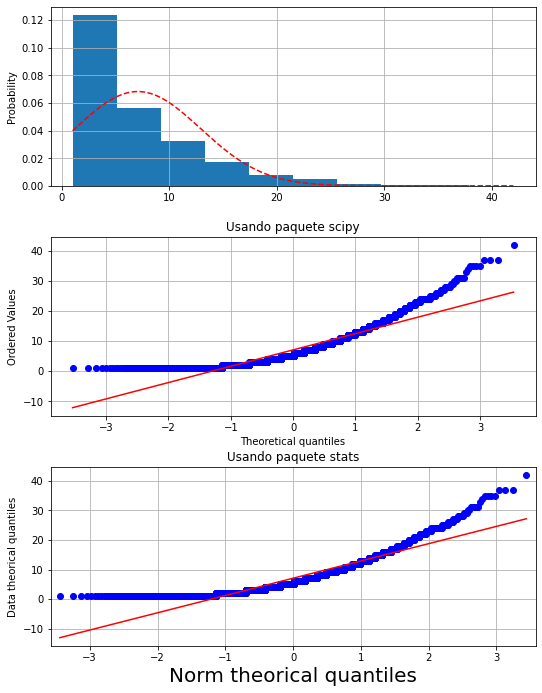

In [88]:
measurements = Nodo1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'norm'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Estimación de los Parámetros

In [89]:
params = st.logistic.fit(Nodo1)
# Separate parts of parameters
arg = params[:-2]
loc1 = params[-2]
scale1 = params[-1]

print('loc=',loc1,'scale=',scale1)

loc= 6.267294523559336 scale= 3.1033656645242083


## Intervalos de confianza

In [90]:
np.random.seed(55555)
#media = 10; sd = 20
N = 100
confianza = 0.95
X = np.random.logistic(loc1,scale1,N)
st.sem
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.logistic.interval(confianza, loc=np.mean(X), scale=st.sem(X))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada' ,np.mean(X))

Con una confianza de 0.95 la media estará en el intervalo t,
 (5.4508405308539505, 7.548489958326133)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (4.563166318988742, 8.436164170191342)
Media calculada 6.499665244590042


## La prueba chi cuadrado - Usando el histograma

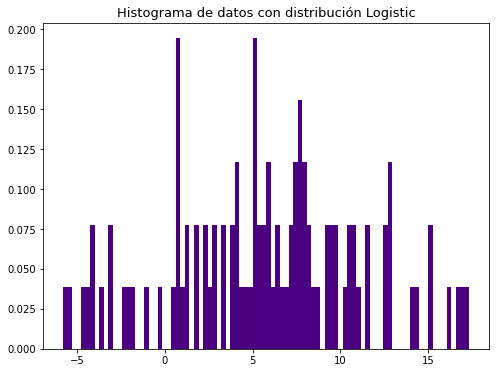

media mu =5.647092, desviación estándar muestral =6.680499


In [91]:
np.random.seed(555)
mu_real = Nodo1.mean()
sigma_real = Nodo1.std()
N = 100 # Cantidad de muestras
n1 = np.random.logistic(loc1, scale1, N)
J = 90  # Cantidad de particiones del histograma
plt.figure(figsize=(8,6))
[freq, x, _] = plt.hist(n1, J, density=True,color='indigo')
plt.title('Histograma de datos con distribución Logistic',size=13)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Resolver prueba de hipótesis
> $H_0$: la distribución es logistic con `loc=6.2672` y `scale=3.1033`

> $H_a$: los datos no se distribuyen como logistic

In [92]:
pi = st.logistic.pdf(x, loc1, scale1)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  16.845021924105065
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=16.845021924105065, pvalue=1.0)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  5.647091747045943 
Desviación estándar muestral =  6.680499210638607


## Método de muestreo estratificado

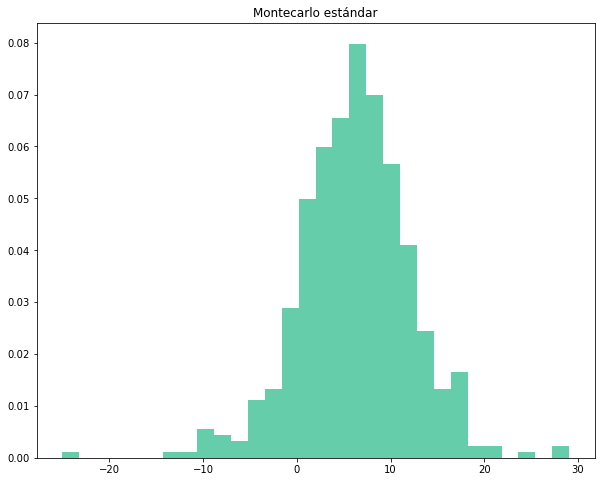

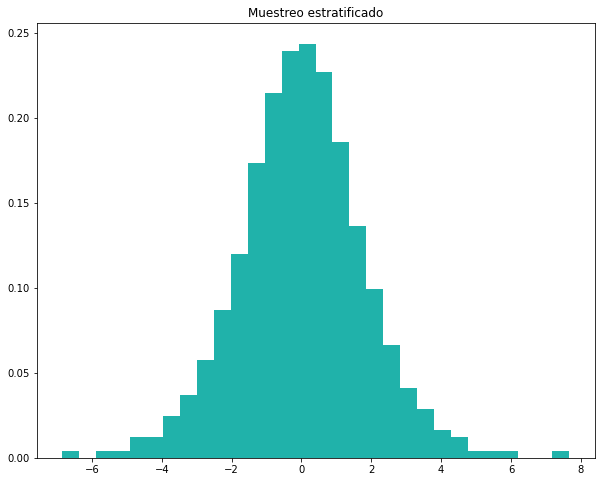

In [93]:
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.logistic.ppf(np.random.rand(N),loc1,scale1)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.logistic.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()

## Nodo 2 - número 2

In [94]:
Nodo2=data_melate['R2']
Nodo2

FECHA
10/3/21       11
7/3/21         7
3/3/21        14
28/02/2021    27
24/02/2021    22
              ..
16/09/1984    10
9/9/84        12
2/9/84        18
26/08/1984     6
19/08/1984     4
Name: R2, Length: 3439, dtype: int64

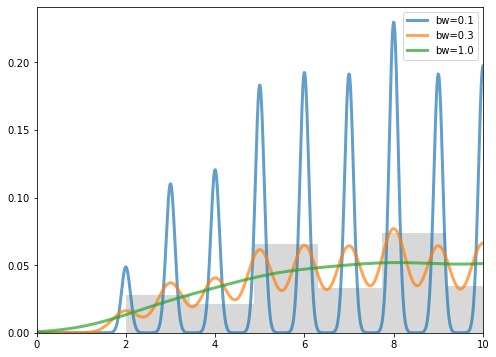

In [106]:
x_grid = np.linspace(0, 10, 1000)
x2 = Nodo2

fig, ax = plt.subplots(figsize=(8,6))
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x2, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(x2, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 10)
ax.legend(loc='upper right')

{'bandwidth': 0.1}


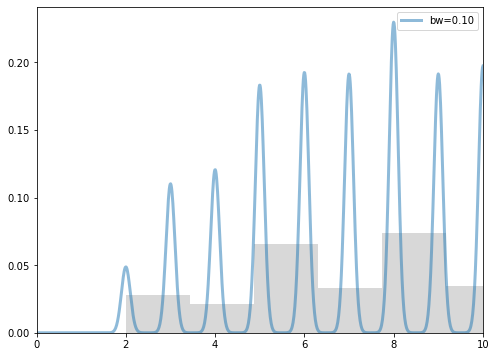

In [50]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=30) # 20-fold cross-validation
grid.fit(x2[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x2, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 10);

## Método de aceptación y rechazo

In [51]:
def kde_sklearn(x2, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x2[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x2: np.exp(kde_skl.score_samples(x2[:, np.newaxis]))
    return pdf

El máximo de f es: 0.22969052491853117


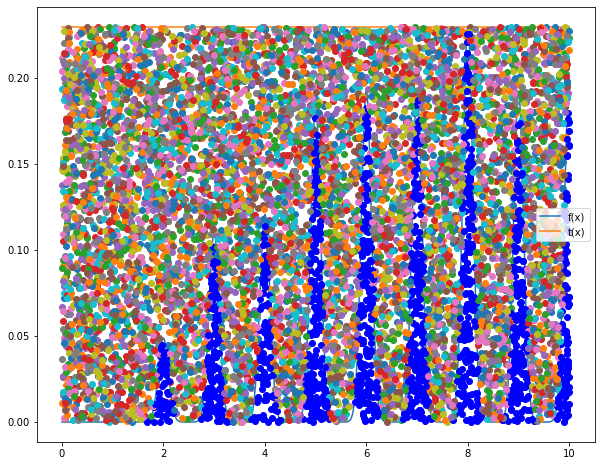

In [52]:
# Función objetivo 
x_grid = np.linspace(0, 10, 1000)
data2 = np.asarray(Nodo2)
f = kde_sklearn(data2, x_grid, bandwidth=0.1)
# Máximo de la función f
max_f = max(f(x2))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,10,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,10,N)
Acep_rechazo(R2,R1,f,t)

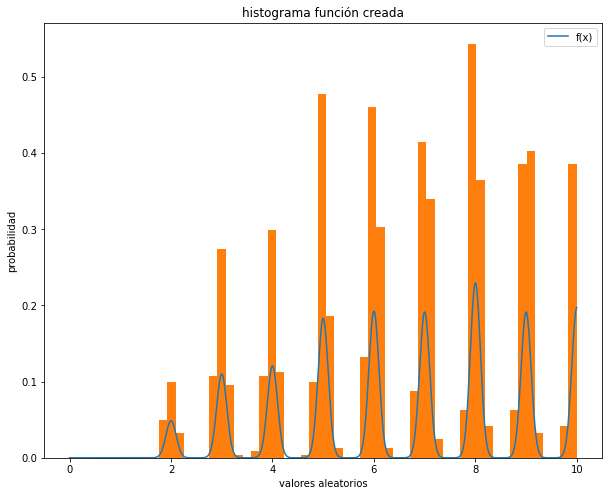

In [53]:
# Función objetivo 
f = kde_sklearn(data2, x_grid, bandwidth=0.1)
x = np.linspace(0,10,1000) # Rango donde se graficará las funciones
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,10,N)
histograma(R2, R1, f, t)

## Distribuciones de probabilidad

[3.53063596003836e-05,
 0.00010228748831188267,
 0.00041205326887597406,
 6.591368593942815e-05,
 5.030983907964757e-05,
 6.64662570026245e-05,
 3.554832493420292e-05,
 7.4028525691659e-05]

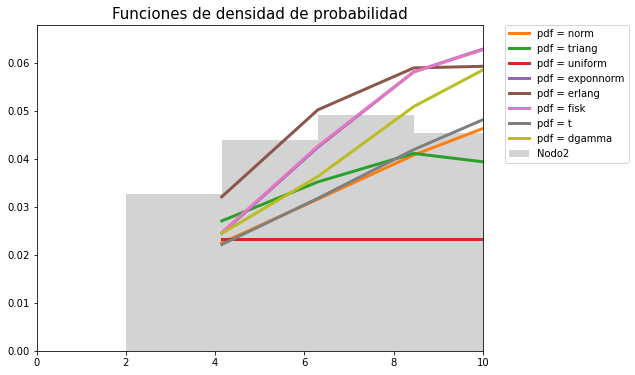

In [54]:
dist_to = ['norm','triang','uniform','exponnorm','erlang','fisk','t','dgamma']
e = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(0, 10)
[y, x, _] = ax.hist(Nodo2, bins=20, density=True, label='Nodo2',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(Nodo2)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    #plt.plot(x,pdf,label='pdf = {dist}'.format(dist_to))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    e.append(((y-pdf)**2).mean())
e

concluir

## Prueba de Kolmogorov-Smirnov

In [55]:
results = []
for i in dist_to:
    dist = getattr(st, i)
    param = dist.fit(Nodo2)
    a = st.kstest(Nodo2, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

erlang: statistic=0.048167818278779584, pvalue=2.2568921583113701e-07
exponnorm: statistic=0.057612679316978666, pvalue=2.3061010407939716e-10
fisk: statistic=0.06014900662720238, pvalue=2.941937469276645e-11
t: statistic=0.07392987621266461, pvalue=8.600211615649161e-17
dgamma: statistic=0.07941728120495897, pvalue=2.587665399568109e-19
norm: statistic=0.08318009906805796, pvalue=3.792836564824879e-21
triang: statistic=0.171573307130371, pvalue=5.500986322648514e-89
uniform: statistic=0.4048973133076814, pvalue=0.0


## Erlang

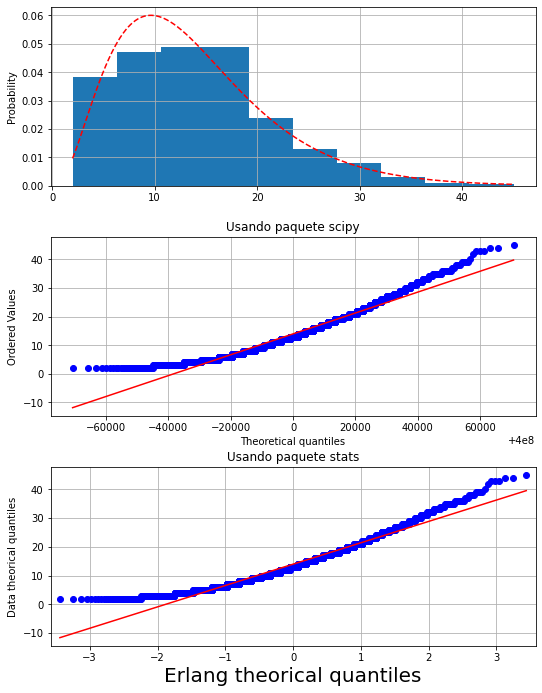

In [56]:
measurements = Nodo2
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'erlang'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## t

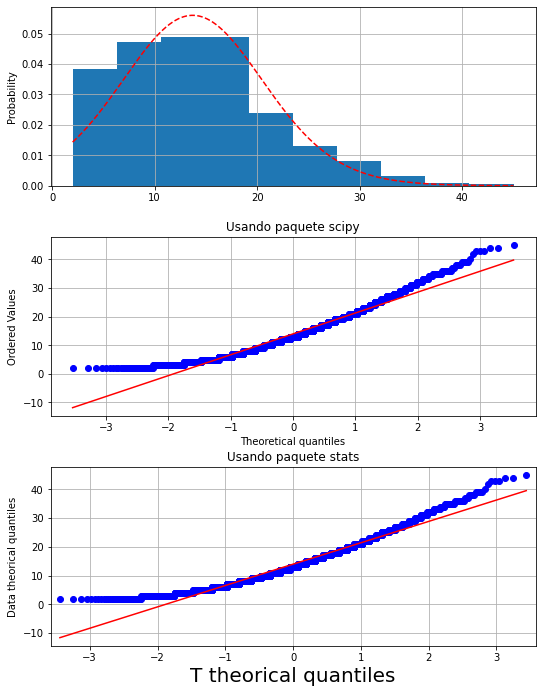

In [60]:
measurements = Nodo2
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 't'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Fisk

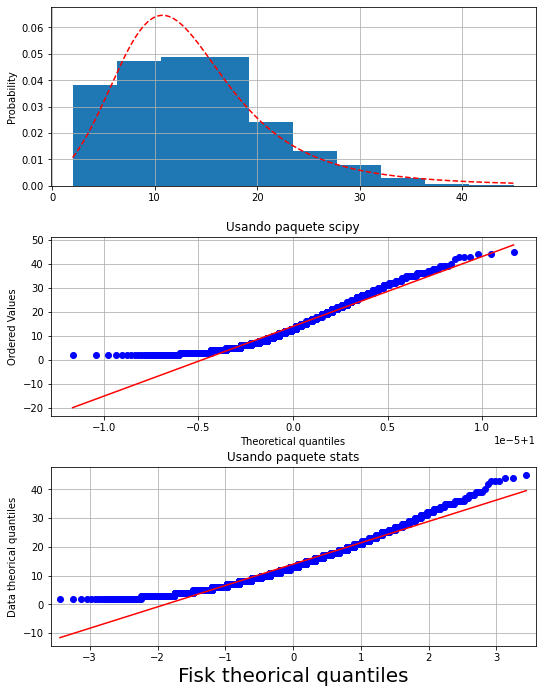

In [24]:
measurements = Nodo2
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'fisk'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Estimación de los Parámetros

In [61]:
params = st.logistic.fit(Nodo2)
# Separate parts of parameters
arg = params[:-2]
loc1 = params[-2]
scale1 = params[-1]

print('loc=',loc1,'scale=',scale1)

loc= 13.403229210869721 scale= 4.214307145487071


## Intervalos de confianza

In [62]:
np.random.seed(55555)
#media = 10; sd = 20
N = 100
confianza = 0.95
X = np.random.logistic(loc1,scale1,N)
st.sem
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.logistic.interval(confianza, loc=np.mean(X), scale=st.sem(X))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada' ,np.mean(X))

Con una confianza de 0.95 la media estará en el intervalo t,
 (12.294501375554418, 15.143066426066508)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (11.089057938226935, 16.34850986339399)
Media calculada 13.718783900810463


**La media de nuestros datos esta entre 13 y 14, como se puede ver en la distribución de los históricos.**


## La prueba chi cuadrado - Usando el histograma

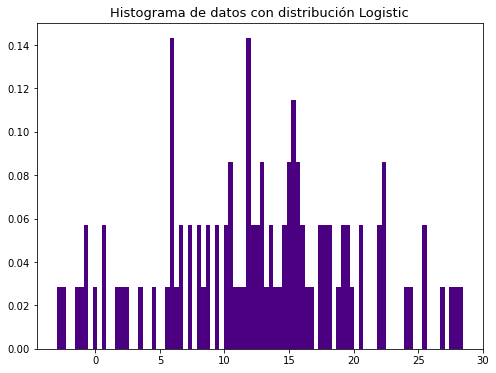

media mu =12.561007, desviación estándar muestral =9.071981


In [64]:
np.random.seed(555)
mu_real = Nodo2.mean()
sigma_real = Nodo2.std()
N = 100 # Cantidad de muestras
n1 = np.random.logistic(loc1, scale1, N)
J = 90  # Cantidad de particiones del histograma
plt.figure(figsize=(8,6))
[freq, x, _] = plt.hist(n1, J, density=True,color='indigo')
plt.title('Histograma de datos con distribución Logistic',size=13)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Resolver prueba de hipótesis
> $H_0$: la distribución es logistic con `loc=12.5610` y `scale=9.0719`

> $H_a$: los datos no se distribuyen como logistic

In [65]:
pi = st.logistic.pdf(x, loc1, scale1)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  30.249252557982565
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=30.249252557982565, pvalue=0.9999999992908848)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  12.561006516138699 
Desviación estándar muestral =  9.071981391252326


**Conclusión**

## Método de muestreo estratificado

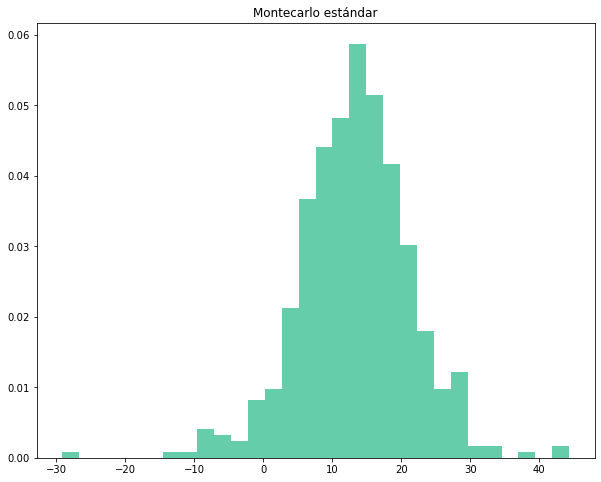

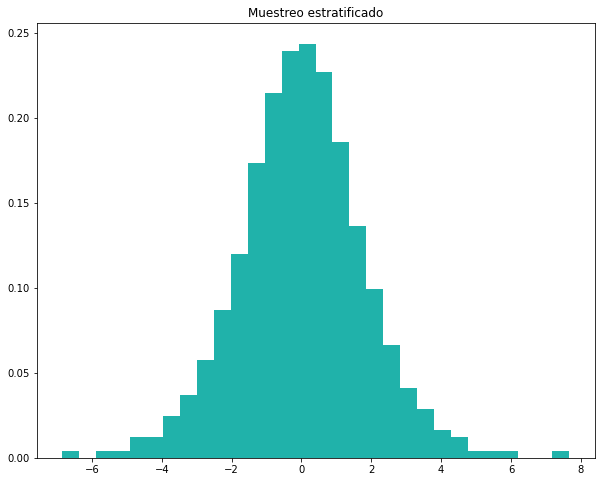

In [31]:
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.logistic.ppf(np.random.rand(N),loc1,scale1)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.logistic.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()



### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.